# We try to see how our SVM fares

## Loading everything

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cv2 import SIFT_create, imread, cvtColor, COLOR_BGR2GRAY, GaussianBlur
from skimage.io import imread

from scripts.utils import extract_frames_info
from scripts.display_utils import show_image_with_bbs

## Looking at how the bouding boxes are distributed


In [9]:
frames_info = extract_frames_info('data/train.csv')
print("Number of frames", len(frames_info))

print("max bbs per frame", np.max([len(info[1]) for info in frames_info]))
print("min bbs per frame", np.min([len(info[1]) for info in frames_info]))
print("mean bbs per frame", np.mean([len(info[1]) for info in frames_info]))

widths = np.array(sum([[bb[2] for bb in info[1]] for info in frames_info], []))

print("mean bb width", np.mean(widths))
print("min bb width", np.min([np.min(info[1][2::4], initial=100) for info in frames_info]))


  0%|          | 0/2226 [01:39<?, ?it/s]


Number of frames 2226
max bbs per frame 25
min bbs per frame 0
mean bbs per frame 8.099281221922732
mean bb width 90.88357646014754
min bb width 0.0


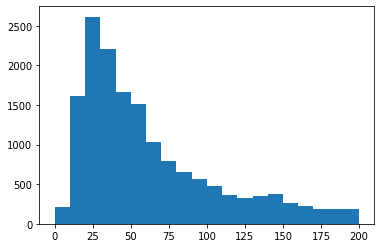

In [12]:
plt.hist(widths, range=[0, 200], bins=20)
plt.show()

In [17]:
from ipywidgets import interact, widgets
from IPython.display import display

def f_display(index):
    show_image_with_bbs(os.path.join("data", frames_info[index][0]), frames_info[index][1])

interact(f_display, index=widgets.IntSlider(min=0, max=len(frames_info), step=1, value=1))

interactive(children=(IntSlider(value=1, description='index', max=2226), Output()), _dom_classes=('widget-inte…

<function __main__.f_display(index)>

## Finding free space

In [80]:
from scripts.hog.bounding_box_utils import find_free_window

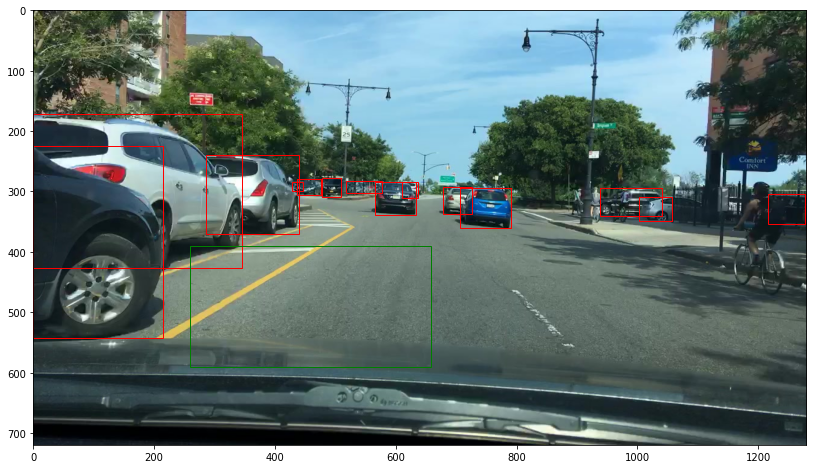

In [91]:
index = 0

new_windows = find_free_window((1280, 720), frames_info[index][1], (400, 200))

show_image_with_bbs(os.path.join("data", frames_info[index][0]), frames_info[index][1] + [new_windows], True)



## Looking at HOG parameters

In [13]:
from skimage.feature import hog
from skimage.transform import resize

(720, 1280, 3) [201 299  71  40]


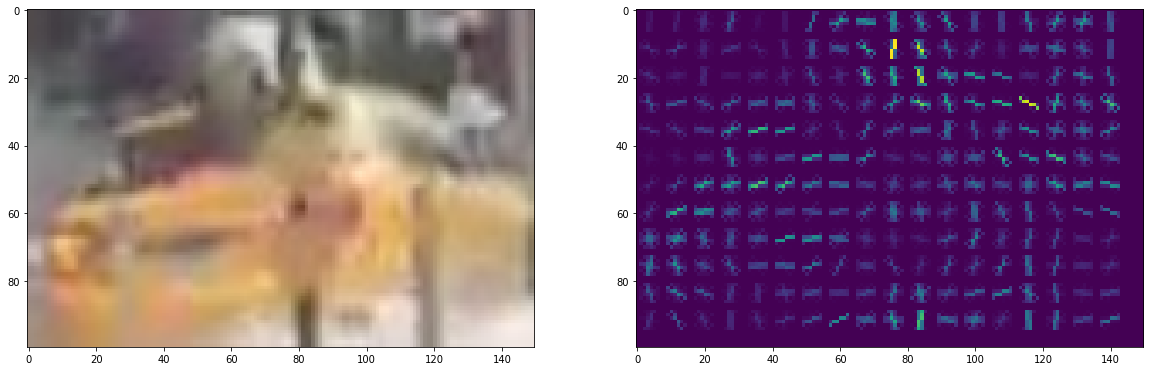

In [18]:
image_index = 285
car_index = 4

image = imread(frames_info[image_index][0])
car_bb = frames_info[image_index][1][car_index]
print(image.shape, car_bb)
car_image = image[car_bb[1]: car_bb[1]+car_bb[3], car_bb[0]: car_bb[0]+car_bb[2]]

car_image = resize(car_image, (100, 150))

fd, hog_image = hog(car_image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(4, 4), visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(car_image)
ax[1].imshow(hog_image)



In [89]:
fd.shape

(17280,)

In [6]:
frames_info[0]

('data\\train/001.jpg',
 [array([  0, 225, 214, 317]),
  array([  0, 172, 345, 254]),
  array([285, 240, 155, 131]),
  array([706, 294,  84,  67]),
  array([565, 284,  68,  55]),
  array([1002,  309,   56,   40]),
  array([678, 293,  48,  44]),
  array([478, 278,  32,  31]),
  array([611, 284,  26,  27]),
  array([436, 280,  41,  26]),
  array([938, 295, 102,  45]),
  array([518, 282,  59,  20]),
  array([1216,  305,   61,   49]),
  array([428, 284,  18,  15]),
  419,
  747,
  32,
  25])

## Misc

In [ ]:

index = 100

image = imread(os.path.join("../../data", frames_info[index][0]))
cvtColor(image, COLOR_BGR2GRAY)
sift = SIFT_create()


In [40]:
kps, f = sift.detectAndCompute(image, None)
print(len(kps))

coords = np.array([kp.pt for kp in kps])


3945


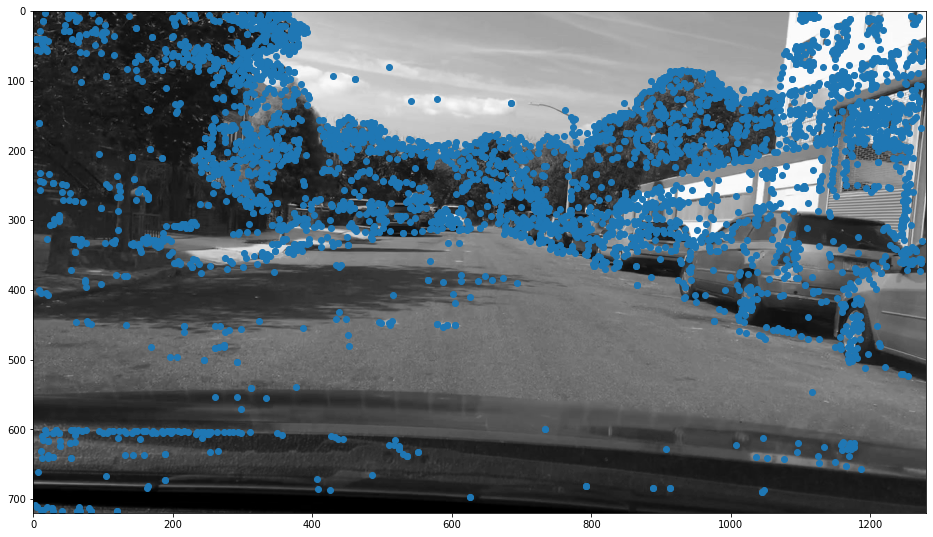

In [42]:
heatmap, xedges, yedges = np.histogram2d(coords[:, 0], coords[:, 1], bins=(200, 120))

heatmap = GaussianBlur(heatmap, [0, 0], 1)
# heatmap = np.ma.masked_array(heatmap, heatmap < .05)

plt.figure(figsize=(16, 12))

plt.imshow(cvtColor(image, COLOR_BGR2GRAY), cmap="gray")
# plt.pcolormesh(xedges, yedges, heatmap.T, alpha=.7)
plt.scatter(coords[:, 0], coords[:, 1])


In [35]:
less_kps, less_f = sift.detectAndCompute(image[:500, :500], None)
print(len(less_kps))
less_coords = np.array([kp.pt for kp in less_kps])


2151


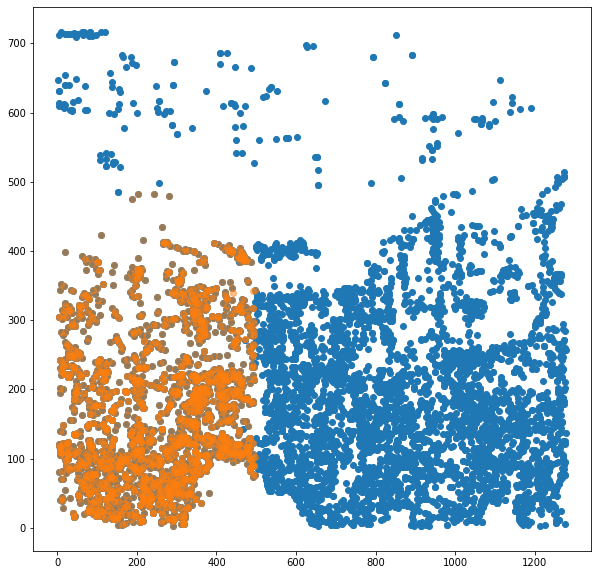

In [36]:

plt.figure(figsize=(10, 10))
plt.scatter(coords[:, 0], coords[:, 1])
plt.scatter(less_coords[:, 0], less_coords[:, 1], alpha=.5)